# 📚 Manga Recommendation System Using NLP & Collaborative Filtering 📚

Welcome to an exciting journey into building a *Manga Recommendation System*! 🎉 In this project, we will leverage **Natural Language Processing (NLP)** and **Collaborative Filtering** to recommend mangas to users based on their preferences and reading history. Let's dive into the steps and methodologies we'll use to create this system! 🚀

## Project Overview 📝

The aim of this project is to create a recommendation system that suggests mangas to users. The recommendation system will analyze user preferences, the content of the mangas, and user ratings to provide personalized manga recommendations.

### Steps to Create the Recommendation System 🛠️

1. **Data Collection 📊**
   - Gather data on various mangas, including titles, genres, descriptions, and user ratings.

2. **Data Preprocessing 🧹**
   - Clean and preprocess the data, handling missing values, and normalizing the text data for NLP.

3. **Feature Extraction using NLP 🧠**
   - Use NLP techniques to extract meaningful features from manga descriptions and genres.
   - Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) will be used to convert text data into numerical features.

4. **Collaborative Filtering Approach 🤝**
   - Implement collaborative filtering to analyze user ratings and find similarities between users and mangas.
   - Techniques like User-User and Item-Item Collaborative Filtering will be used to generate recommendations.

5. **Model Training & Evaluation 📈**
   - Train the recommendation model using the preprocessed data and extracted features.
   - Evaluate the model's performance using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).

6. **Building the Web Interface 🌐**
   - Create a user-friendly web interface where users can input their preferences and get manga recommendations.
   - Implement search functionality with autocomplete to enhance user experience.

### Collaborative Filtering Approach Explained 📖

**Collaborative Filtering** is a technique used to make automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

#### Types of Collaborative Filtering:

1. **User-User Collaborative Filtering**
   - This method finds users who are similar to the target user and recommends items that those similar users have liked.
   
2. **Item-Item Collaborative Filtering**
   - This method finds items that are similar to the items the target user has liked in the past and recommends those items.

### Why Use Collaborative Filtering? 🤔

- **Personalization**: Provides highly personalized recommendations by leveraging the preferences of similar users.
- **Scalability**: Efficiently handles large datasets and generates recommendations in real-time.
- **Simplicity**: Easy to implement and understand, making it a popular choice for recommendation systems.

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import joblib as j
import seaborn as sn
import warnings as w
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
w.filterwarnings('ignore')

# 📊 Data Merging and Shape Analysis 📊

In this project, we are working with multiple datasets containing valuable information. The goal is to merge these datasets and analyze the combined shape to ensure we have a complete and comprehensive dataset for our analysis. Let's dive into the steps involved in this process! 🚀

## Step 1: Loading the Datasets 📂

First, we load four different CSV files into Pandas DataFrames. Each of these files represents a dataset collected at different times:

- **m1**: Data collected on April 28, 2021 📅
- **m2**: Data collected in August 2020 📅
- **m3**: Data collected on May 2, 2021 📅
- **m4**: Data collected on May 3, 2021 📅

By loading these datasets into separate DataFrames, we can manipulate and analyze them individually before combining them.

## Step 2: Checking the Shape of Each DataFrame 🔍

We print the shape of each DataFrame to understand the dimensions of our data. The shape gives us information about the number of rows and columns in each dataset:

- **m1**: Checking the shape of data from April 28, 2021 🧩
- **m2**: Checking the shape of data from August 2020 🧩
- **m3**: Checking the shape of data from May 2, 2021 🧩
- **m4**: Checking the shape of data from May 3, 2021 🧩

This helps us verify that the data has been loaded correctly and gives us an idea of the size of each dataset.

## Step 3: Merging the Datasets 🔗

Next, we use the `pd.concat()` function to merge all four DataFrames into a single DataFrame. This is done along the rows to combine all the data points:

- **Combining the datasets**: Merging m1, m2, m3, and m4 into a single comprehensive dataset 🧬

Combining the datasets allows us to perform analysis on the entire dataset as a whole, rather than on individual parts.

## Step 4: Resetting the Index 🔄

After merging, we reset the index of the combined DataFrame to ensure that the index runs from 0 to the length of the DataFrame minus one. This standardizes the DataFrame for easier manipulation and analysis:

- **Resetting the index**: Ensuring a clean and sequential index for the merged dataset 🆕

## Final Shape Analysis 📏

Finally, we check the shape of the merged DataFrame to understand its dimensions and ensure that all data points have been combined successfully:

- **Shape of merged DataFrame**: Verifying the final dimensions of our combined dataset 🔍📐

This gives us a complete picture of our dataset and ensures that we are ready for the next steps in our analysis.

---

With these steps, we have successfully loaded, merged, and analyzed the shape of our multiple datasets, setting a solid foundation for further analysis and insights! 🎉📈


In [237]:
m1=pd.read_csv('Apr28_2021.csv')
m2=pd.read_csv('Aug2020.csv')
m3=pd.read_csv('May2_2021.csv')
m4=pd.read_csv('May3_2021.csv')

In [238]:
print(f"shape of m1: {m1.shape},shape of m2: {m2.shape},shape of m3: {m3.shape},shape of m4: {m4.shape}")

shape of m1: (14819, 12),shape of m2: (24247, 12),shape of m3: (14825, 12),shape of m4: (29665, 12)


In [239]:
m1.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [240]:
m1.head(2)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...


In [241]:
m1.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [242]:
m1.head(4)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...
3,Drop-Dead Beauty,Chapter 144,"Apr 28,21",2,180.0,manganelo.com,0.496052,https://manganelo.com/manga/bx924817,"Drama,Fantasy,Historical,Romance,Shoujo,Webtoons",Ongoing,4.51,https://avt.mkklcdnv6temp.com/41/n/22-16067508...


In [243]:
df=pd.concat([m1,m2,m3,m4],axis=0)

In [244]:
df.reset_index(drop=True,inplace=True)

In [245]:
df.shape

(83556, 12)

In [246]:
df.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.4,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [247]:
df.tail(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
83553,Real Love (Kayama Yumi),Vol.1 Ch.3 : Coffee Break,"Jan 20,16",531,180.0,manganelo.com,0.16152620315551758,https://manganelo.com/manga/real_love_kayama_yumi,Yaoi,Ongoing,4.91,https://avt.mkklcdnv6temp.com/4/q/12-158348600...
83554,Soushoku Danshi O-Kotowari,Ch.ibi-Manga : [Oneshot],"Jan 20,16",530,180.0,manganelo.com,0.17030644416809082,https://manganelo.com/manga/soushoku_danshi_ok...,"One shot,Romance,School life,Shoujo",Completed,5,https://avt.mkklcdnv6temp.com/34/f/3-158346902...
83555,Scissor Sisters,Ch.6,"Jan 20,16",529,180.0,manganelo.com,0.17342472076416016,https://manganelo.com/manga/scissor_sisters,"Action,Comedy,Supernatural",Ongoing,5,https://avt.mkklcdnv6temp.com/7/z/9-1583480401...


In [248]:
df.sample(5)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
66463,Fushigi Yuugi - Byakko Ibun,Vol.1 Chapter 1,"Jan 20,16",584,180.0,manganelo.com,0.19390392303466797,https://manganelo.com/manga/fushigi_yuugi_byak...,"Action,Cooking,Drama,Historical,Josei,Romance",Ongoing,5,https://avt.mkklcdnv6temp.com/9/j/6-1583474483...
47717,Orefeti,Vol.1 Ch.6,"Jan 21,16",418,180.0,manganelo.com,0.44188,https://manganelo.com/manga/orefeti,"Comedy,Shounen",Ongoing - No Set Relea,5.0,https://avt.mkklcdnv6temp.com/30/v/10-15834832...
36670,Hardcore Leveling Warrior,Chapter 241: [Season 2] Ep. 58,"Sep 11,20",8,180.0,manganelo.com,0.38118553161621094,https://manganelo.com/manga/wdaq187991567387650,Webtoons,Ongoing,4.5,https://avt.mkklcdnv6.com/22/n/13-1583488557.jpg
22661,Shaman King Man Ji En,Ch.2,"Jan 21,16",370,180.0,manganelo.com,0.30318522453308105,https://manganelo.com/manga/read_shaman_king_m...,"Action,Adult,Comedy,Doujinshi,Martial arts,Sei...",Ongoing,5,https://avt.mkklcdnv6.com/21/i/10-1583482944.jpg
79195,Koigokoro Fantasia,Vol.1 Chapter 7,"Jan 20,16",439,180.0,manganelo.com,0.15419650077819824,https://manganelo.com/manga/koigokoro_fantasia,"Drama,Romance,Shoujo",Completed,5,https://avt.mkklcdnv6temp.com/2/p/6-1583474193...


# 🧹 Data Cleaning and Preprocessing 🧼

In this section, we focus on cleaning and preprocessing our dataset `df` to ensure it is ready for analysis and modeling. Let's walk through each step involved in this process! 🚀

## Step 1: Dropping Duplicates 🗑️

We start by removing duplicate rows from our DataFrame `df` to ensure each entry is unique:

- **Dropping duplicates**: Eliminating duplicate rows to clean the dataset 🚫

## Step 2: Checking Dataset Information ℹ️

Next, we inspect the information about our DataFrame to understand its structure and properties:

- **Checking dataset info**: Obtaining information about the DataFrame structure and data types 📊

## Step 3: Handling Missing Values 🕳️

We then identify and handle missing values in the DataFrame `df`:

- **Handling missing values**: Counting and addressing missing values to maintain data integrity ⚠️

## Step 4: Further Cleaning Operations ✨

Continuing with data cleaning, we perform additional operations:

- **Removing NaN values**: Dropping rows with NaN values to ensure completeness 📉
- **Dropping duplicates by column 'Name'**: Ensuring uniqueness based on 'Name' column for accurate analysis 🔍

## Step 5: Data Quality Enhancement 📈

To enhance data quality, we focus on the 'Rating' column:

- **Unique rating values**: Checking unique values in the 'Rating' column for data consistency 🌟
- **Converting 'Rating' to numeric**: Converting 'Rating' column to numeric type, handling errors if any 📏

## Step 6: Filtering Rating Range 🎯

We restrict the 'Rating' column to values between 1 and 5:

- **Filtering rating range**: Ensuring 'Rating' values are within the acceptable range for meaningful analysis 📊

## Step 7: Preparing Personalized DataFrame 📄

Creating a `personal_df` DataFrame based on processed data for personalized analysis:

- **Creating personal_df**: Extracting and viewing the first three rows of `personal_df` for initial exploration 📋

## Step 8: Finalizing Data Cleanup 🧽

Lastly, we perform final cleanup operations on `df`:

- **Dropping NaN values from 'Rating'**: Removing remaining rows with NaN values in the 'Rating' column for completeness 🗃️
- **Resetting index**: Resetting the index of `df` for a clean, sequential order before further analysis 🔢

## Step 9: Visualizing Data Distribution 📊

Visualizing the distribution of 'Rating' using a histogram:

- **Histogram plot**: Plotting a histogram to visualize the distribution of 'Rating' values 📈

---

With these comprehensive steps, we have effectively cleaned and prepared our dataset `df` for subsequent analysis, ensuring high data quality and integrity throughout the process! 🌟🔍


In [249]:
df.drop_duplicates(inplace=True)

In [250]:
df.shape

(83543, 12)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83543 entries, 0 to 83555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              83541 non-null  object
 1   Latest Chapter    83543 non-null  object
 2   Dated Released    83543 non-null  object
 3   depth             83543 non-null  object
 4   download_timeout  83543 non-null  object
 5   download_slot     83543 non-null  object
 6   download_latency  83543 non-null  object
 7   Link              83543 non-null  object
 8   Genre             82553 non-null  object
 9   Status            82317 non-null  object
 10  Rating            83543 non-null  object
 11  img-link          83543 non-null  object
dtypes: object(12)
memory usage: 8.3+ MB


In [252]:
df.isna().sum()

Name                   2
Latest Chapter         0
Dated Released         0
depth                  0
download_timeout       0
download_slot          0
download_latency       0
Link                   0
Genre                990
Status              1226
Rating                 0
img-link               0
dtype: int64

In [253]:
df.isna().sum()

Name                   2
Latest Chapter         0
Dated Released         0
depth                  0
download_timeout       0
download_slot          0
download_latency       0
Link                   0
Genre                990
Status              1226
Rating                 0
img-link               0
dtype: int64

In [254]:
df=df.dropna()

In [255]:
df.isna().sum()

Name                0
Latest Chapter      0
Dated Released      0
depth               0
download_timeout    0
download_slot       0
download_latency    0
Link                0
Genre               0
Status              0
Rating              0
img-link            0
dtype: int64

In [256]:
df=df.drop_duplicates('Name')

In [257]:
df.shape

(27758, 12)

In [258]:
df.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.4,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [259]:
df['Rating'].unique()

array([4.4, 4.26, 4.76, 4.51, 4.47, 4.07, 4.27, 2.16, 4.22, 4.5, 4.61,
       4.36, 2.73, 4.87, 3.33, 4.86, 3.8, 4.57, 33337.88, 4.48, 4.77,
       3.95, 4.59, 3.79, 4.75, 3.92, 4.67, 4.83, -413.19, 4.79, 3.51,
       4.64, 4.28, 4.46, 4.33, 4.9, 4.74, 4.88, 4.82, 4.73, 3.53, 4.69,
       4.17, 4.16, -254.01, 3.84, 4.3, 4.44, 3.35, -6596.15, 4.68, 4.6,
       4.29, 4.71, 4.34, 4.24, 4.35, 4.49, 3.13, 4.65, 4.18, 3.0, 4.72,
       3.82, 4.23, 4.58, 4.19, 4.38, 3.7, 3.29, 4.55, 4.52, 4.09, 4.7,
       4.42, 3.62, 4.45, 4.15, 2.6, 4.43, 3.46, 2.62, 3.68, 75404.95,
       3.73, 4.01, 2.48, 4.0, 3.86, 1350004.65, 4.11, 3.76, 3.67, 4.85,
       4.54, 4.39, 4.62, 3.9, 4.25, 4.84, 56597.94, 4.12, 3.78, 4.31,
       56.8, 3397.02, 4.81, 4.91, 4.8, 21241.58, 4.63, 3.42, 4.94, 3.97,
       -33.92, 4.78, 4.32, 4.05, 3.99, 3.89, 2.69, 4.66, 148196.65, 3.74,
       170266.01, -8669.74, -10587.94, 3.27, -137317.39, -1851275.42,
       3.54, 2.8, 3.16, 2.88, 3.4, 4.56, 4.89, 3.83, 4.1, 3.31, 8807.54,


In [260]:
df.shape

(27758, 12)

In [261]:
df[df['Rating']!='Rating']

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.4,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...
3,Drop-Dead Beauty,Chapter 144,"Apr 28,21",2,180.0,manganelo.com,0.496052,https://manganelo.com/manga/bx924817,"Drama,Fantasy,Historical,Romance,Shoujo,Webtoons",Ongoing,4.51,https://avt.mkklcdnv6temp.com/41/n/22-16067508...
4,A Thousand Tricks Of Hunting You,Chapter 5,"Apr 28,21",2,180.0,manganelo.com,0.516886,https://manganelo.com/manga/gr926451,"Drama,Romance,Shoujo",Ongoing,4.47,https://avt.mkklcdnv6temp.com/8/u/24-161940632...
...,...,...,...,...,...,...,...,...,...,...,...,...
82459,Hagoromo Mishin,Vol.1 Chapter 5.5,"Jan 20,16",579,180.0,manganelo.com,0.14870429039001465,https://manganelo.com/manga/hagoromo_mishin,"Comedy,Romance,Shoujo",Completed,5,https://avt.mkklcdnv6temp.com/31/a/4-158347096...
83217,Aimai Na Kankei,Ch.0,"Jan 20,16",613,180.0,manganelo.com,0.17407774925231934,https://manganelo.com/manga/aimai_na_kankei,"Mature,One shot,Yaoi",Completed,4.71,https://avt.mkklcdnv6temp.com/40/n/12-15834873...
83257,Ai De Asobu,Ch.10 : Only One,"Jan 20,16",615,180.0,manganelo.com,0.15291452407836914,https://manganelo.com/manga/ai_de_asobu,"Adult,Josei,Romance,Seinen",Ongoing,5,https://avt.mkklcdnv6temp.com/14/q/7-158347683...
83400,Monkey High!,Vol.8 Ch.31 : Monkey High! + Extra,"Jan 20,16",596,180.0,manganelo.com,0.15416455268859863,https://manganelo.com/manga/monkey_high,"Action,Adult,Comedy,Cooking,Romance,School lif...",Completed,4.86,https://avt.mkklcdnv6temp.com/22/w/4-158347062...


In [262]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [263]:
df['Rating'] = df['Rating'].where((df['Rating'] >= 1) & (df['Rating'] <= 5))


In [264]:
df.shape

(27758, 12)

In [265]:
personal_df=df

In [266]:
personal_df.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [267]:
df.dropna(subset=['Rating'], inplace=True)

In [268]:
df.shape

(27715, 12)

In [269]:
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='Rating', ylabel='Count'>

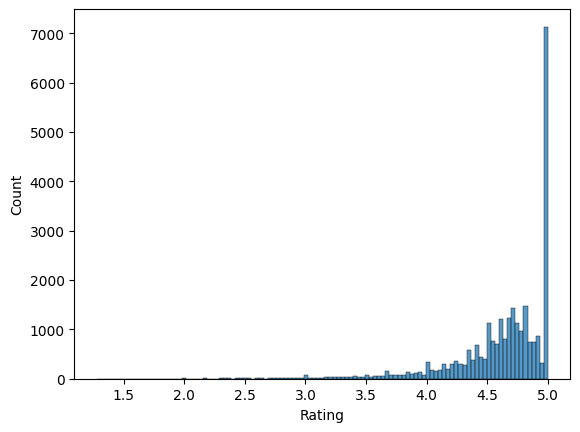

In [270]:
sn.histplot(df['Rating'])

In [271]:
df.head(3)

,Name,Latest Chapter,Dated Released,depth,download_timeout,download_slot,download_latency,Link,Genre,Status,Rating,img-link
0,Vampire Chef,Chapter 79,"Apr 28,21",2,180.0,manganelo.com,0.365714,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",Ongoing,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,"Apr 28,21",2,180.0,manganelo.com,0.457697,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",Ongoing,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,"Apr 28,21",2,180.0,manganelo.com,0.500762,https://manganelo.com/manga/op918407,"Fantasy,Romance",Ongoing,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [272]:
df.columns

Index(['Name', 'Latest Chapter', 'Dated Released', 'depth', 'download_timeout',
       'download_slot', 'download_latency', 'Link', 'Genre', 'Status',
       'Rating', 'img-link'],
      dtype='object')

# 🧼 Further Data Cleaning and Transformation 🔄

Continuing from our previous data cleaning steps, we proceed with further cleaning and transformation operations on the DataFrame `df`. Let's delve into each step involved in this process! 🚀

## Step 1: Removing Unnecessary Columns 🗑️

We start by removing several columns from `df` that are not relevant for our current analysis:

- **Removing columns**: Dropping columns like 'Dated Released', 'depth', 'download_timeout', 'download_slot', 'download_latency', and 'Status' to streamline the dataset 📉

## Step 2: Analyzing Manga Names 📚

Next, we analyze the manga names in the dataset to gain insights:

- **Manga name counts**: Counting occurrences of each manga name using `value_counts()` 📊
- **Unique manga names**: Listing unique manga names in the dataset using `unique()` 🔍

## Step 3: Cleaning Manga Names ✨

Cleaning manga names by stripping leading and trailing spaces for consistency:

- **Stripping whitespace**: Removing leading and trailing spaces from manga names using `str.strip()` for uniformity 🌟

## Step 4: Retrieving Latest Chapter Information ℹ️

Extracting the latest chapter information for manga titled 'The':

- **Extracting latest chapter**: Retrieving latest chapter details specifically for manga named 'The' using `loc` and filtering 📖

## Step 5: Handling Duplicates 🗃️

Dealing with duplicates based on manga name and latest chapter to ensure data uniqueness:

- **Dropping duplicates**: Removing duplicate rows based on 'Name' and 'Latest Chapter' while retaining the first occurrence using `drop_duplicates()` 🔄

## Step 6: Resetting DataFrame Index 🔢

Resetting the index of `df` for a clean, sequential order after operations:

- **Resetting index**: Rearranging the index of `df` to maintain order and integrity using `reset_index()` 📋

## Step 7: Parsing Genre Information 🎭

Parsing and transforming the 'Genre' column to a list format for easier analysis:

- **Splitting genres**: Breaking down the comma-separated values in the 'Genre' column into individual elements using `apply()` and `split(',')` 📊

---

By systematically executing these cleaning and transformation steps, we ensure that our dataset `df` is well-prepared and structured for subsequent analysis and modeling tasks! 🌟🔍


In [273]:
df.drop(['Dated Released','depth','download_timeout',
       'download_slot', 'download_latency', 'Status'],axis=1,inplace=True)

In [274]:
df.columns

Index(['Name', 'Latest Chapter', 'Link', 'Genre', 'Rating', 'img-link'], dtype='object')

In [275]:
df.head(3)

,Name,Latest Chapter,Link,Genre,Rating,img-link
0,Vampire Chef,Chapter 79,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,https://manganelo.com/manga/op918407,"Fantasy,Romance",4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [276]:
df.shape

(27715, 6)

In [277]:
df['Name'].value_counts()

Vampire Chef              1
Sweet Chapel              1
Telepathy Shoujo "ran"    1
Super Robot Retsuden      1
Superior Cross            1
                         ..
Zanbara!                  1
Zankoku Na Douwatachi     1
Hero Co., Ltd.            1
Hideout                   1
Kurogane Hime             1
Name: Name, Length: 27715, dtype: int64

In [278]:
df['Name'].unique()

array(['Vampire Chef', 'Part Time Boyfriend',
       'Ningen Desuga Maou Totsugu Koto Ni Narimashita', ...,
       'Ai De Asobu', 'Monkey High!', 'Kurogane Hime'], dtype=object)

In [279]:
df['Name']=df['Name'].str.strip()

In [280]:
latest_chapter_for_the = df.loc[df['Name'] == 'The ', 'Latest Chapter']


print(latest_chapter_for_the)

Series([], Name: Latest Chapter, dtype: object)


In [281]:
df.drop_duplicates(subset=['Name', 'Latest Chapter'], keep='first', inplace=True)


In [282]:
df.reset_index(drop=True, inplace=True)

In [283]:
df.shape

(27714, 6)

In [284]:
df['Name'].value_counts()

Pendant Of The Elemental    2
I Found Somebody To Love    2
My 36D Maid                 2
Vampire Chef                1
Sweet Black                 1
                           ..
Helios Chronicles           1
Zanbara!                    1
Zankoku Na Douwatachi       1
Hero Co., Ltd.              1
Kurogane Hime               1
Name: Name, Length: 27711, dtype: int64

In [285]:
df.head(3)

,Name,Latest Chapter,Link,Genre,Rating,img-link
0,Vampire Chef,Chapter 79,https://manganelo.com/manga/sg920868,"Romance,Shoujo,Webtoons",4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...
1,Part Time Boyfriend,Chapter 1 : Prologue,https://manganelo.com/manga/vn926396,"Comedy,Drama,Harem,Romance",4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,https://manganelo.com/manga/op918407,"Fantasy,Romance",4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...


In [286]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(','))

# 📊 Encoding, Scaling, and Data Integration 🔄

In this phase of data preparation for our Manga Recommendation System, we perform several critical tasks to enhance our dataset `df` and `main_df` for modeling and analysis purposes. Let's break down each step involved in this process! 🚀

## Step 1: Genre Encoding 🎭

We start by encoding the 'Genre' column using `MultiLabelBinarizer` to transform categorical genre information into a binary format:

- **Genre encoding**: Utilizing `MultiLabelBinarizer` to encode genres into binary format, creating `genre_encoded` 📑

## Step 2: Integrating Encoded Genres into DataFrame 🔄

Next, we integrate the encoded genre information back into our main dataset `df`:

- **Merging datasets**: Merging `df` with `genre_df` (containing encoded genres) on 'Name', replacing the original 'Genre' column 🔗

## Step 3: Data Cleaning 🧼

Following integration, we proceed with data cleaning tasks including:
- **Removing duplicates**: Removing duplicate rows based on certain criteria for data integrity 🗑️
- **Removing unnecessary columns**: Dropping columns like 'Latest Chapter' for streamlined analysis and modeling purposes 📉

## Step 4: Scaling Numerical Features 📏

Scaling numerical features in `df` using `MinMaxScaler` for normalization:

- **Feature scaling**: Applying `MinMaxScaler` to transform numerical features into a standardized range between 0 and 1 📊

## Step 5: Data Integration 🔄

Integrating scaled data with side information (`side_df`) back into the main dataset:

- **Concatenating datasets**: Concatenating `side_df` with `mx_tra` (scaled `df`) to form the finalized `df` for analysis and modeling 🔄

## Step 6: Finalizing Main DataFrame 🔍

Setting 'Name' as the index and ensuring uniqueness in `df` and `main_df`:

- **Setting index**: Setting 'Name' as the index in `df` and `main_df` to facilitate efficient data retrieval and analysis 📋

## Step 7: Dataset Size Adjustment 📈

Adjusting the size of `main_df` to optimize memory usage and performance:

- **Data trimming**: Limiting `main_df` to the first 16000 rows for manageable size and focus 📊

---

By meticulously executing these encoding, scaling, integration, and finalization steps, we prepare our dataset `df` and `main_df` for building robust models and delivering effective recommendations in our Manga Recommendation System! 🌟📘


In [287]:
mlb=MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
genre_df['Name'] = df['Name']


In [288]:
df = df.drop(columns=['Genre']).merge(genre_df, on='Name')

In [289]:
df.shape

(27720, 45)

In [290]:
df.head()

,Name,Latest Chapter,Link,Rating,img-link,Action,Adult,Adventure,Comedy,Cooking,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,Vampire Chef,Chapter 79,https://manganelo.com/manga/sg920868,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Part Time Boyfriend,Chapter 1 : Prologue,https://manganelo.com/manga/vn926396,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,https://manganelo.com/manga/op918407,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Drop-Dead Beauty,Chapter 144,https://manganelo.com/manga/bx924817,4.51,https://avt.mkklcdnv6temp.com/41/n/22-16067508...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,A Thousand Tricks Of Hunting You,Chapter 5,https://manganelo.com/manga/gr926451,4.47,https://avt.mkklcdnv6temp.com/8/u/24-161940632...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
df.drop_duplicates(inplace=True)

In [292]:
df.shape

(27714, 45)

In [293]:
df.isna().sum()

Name              0
Latest Chapter    0
Link              0
Rating            0
img-link          0
Action            0
Adult             0
Adventure         0
Comedy            0
Cooking           0
Doujinshi         0
Drama             0
Ecchi             0
Fantasy           0
Gender bender     0
Harem             0
Historical        0
Horror            0
Isekai            0
Josei             0
Manhua            0
Manhwa            0
Martial arts      0
Mature            0
Mecha             0
Medical           0
Mystery           0
One shot          0
Psychological     0
Romance           0
School life       0
Sci fi            0
Seinen            0
Shoujo            0
Shoujo ai         0
Shounen           0
Shounen ai        0
Slice of life     0
Smut              0
Sports            0
Supernatural      0
Tragedy           0
Webtoons          0
Yaoi              0
Yuri              0
dtype: int64

In [294]:
df.head(3)

,Name,Latest Chapter,Link,Rating,img-link,Action,Adult,Adventure,Comedy,Cooking,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,Vampire Chef,Chapter 79,https://manganelo.com/manga/sg920868,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Part Time Boyfriend,Chapter 1 : Prologue,https://manganelo.com/manga/vn926396,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,Chapter 66,https://manganelo.com/manga/op918407,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
df.drop('Latest Chapter',axis=1,inplace=True)

In [296]:
df=df.drop_duplicates()

In [297]:
df.head(3)

,Name,Link,Rating,img-link,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,Vampire Chef,https://manganelo.com/manga/sg920868,4.40,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Part Time Boyfriend,https://manganelo.com/manga/vn926396,4.26,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ningen Desuga Maou Totsugu Koto Ni Narimashita,https://manganelo.com/manga/op918407,4.76,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
df.sample(3)

,Name,Link,Rating,img-link,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
344,Saving The Villain Who Was Abandoned By The Fe...,https://manganelo.com/manga/cg924552,4.65,https://avt.mkklcdnv6temp.com/30/k/22-16034446...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1723,Sentaku No Toki,https://manganelo.com/manga/sentaku_no_toki,4.76,https://avt.mkklcdnv6temp.com/44/p/15-15834932...,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9298,Eden - It's An Endless World!,https://manganelo.com/manga/eden_its_an_endles...,4.63,https://avt.mkklcdnv6temp.com/47/j/9-158348208...,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [299]:

minmx=MinMaxScaler()
side_df=df[['Link','img-link','Name']]
df=df.drop(['Link','img-link','Name'],axis=1)

In [300]:
mx_tra=minmx.fit_transform(df)

In [301]:
mx_tra =pd.DataFrame(mx_tra, columns=df.columns)


In [302]:
mx_tra.head(5)

,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,Ecchi,Fantasy,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.868280,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.857527,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
df = pd.concat([side_df.reset_index(drop=True), mx_tra.reset_index(drop=True)], axis=1)

In [304]:
df.shape

(27714, 44)

In [305]:
df.head(3)

,Link,img-link,Name,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,https://manganelo.com/manga/sg920868,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,Vampire Chef,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,https://manganelo.com/manga/vn926396,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,Part Time Boyfriend,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://manganelo.com/manga/op918407,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,Ningen Desuga Maou Totsugu Koto Ni Narimashita,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
df.columns

Index(['Link', 'img-link', 'Name', 'Rating', 'Action', 'Adult', 'Adventure',
       'Comedy', 'Cooking', 'Doujinshi', 'Drama', 'Ecchi', 'Fantasy',
       'Gender bender', 'Harem', 'Historical', 'Horror', 'Isekai', 'Josei',
       'Manhua', 'Manhwa', 'Martial arts', 'Mature', 'Mecha', 'Medical',
       'Mystery', 'One shot', 'Psychological', 'Romance', 'School life',
       'Sci fi', 'Seinen', 'Shoujo', 'Shoujo ai', 'Shounen', 'Shounen ai',
       'Slice of life', 'Smut', 'Sports', 'Supernatural', 'Tragedy',
       'Webtoons', 'Yaoi', 'Yuri'],
      dtype='object')

In [307]:
main_df=df[['Name','Rating', 'Action', 'Adult', 'Adventure', 'Comedy', 'Cooking',
       'Doujinshi', 'Drama', 'Ecchi', 'Fantasy', 'Gender bender', 'Harem',
       'Historical', 'Horror', 'Isekai', 'Josei', 'Manhua', 'Manhwa',
       'Martial arts', 'Mature', 'Mecha', 'Medical', 'Mystery', 'One shot',
       'Psychological', 'Romance', 'School life', 'Sci fi', 'Seinen', 'Shoujo',
       'Shoujo ai', 'Shounen', 'Shounen ai', 'Slice of life', 'Smut', 'Sports',
       'Supernatural', 'Tragedy', 'Webtoons', 'Yaoi', 'Yuri']]

In [308]:
df.head(3)

,Link,img-link,Name,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
0,https://manganelo.com/manga/sg920868,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,Vampire Chef,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,https://manganelo.com/manga/vn926396,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,Part Time Boyfriend,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://manganelo.com/manga/op918407,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,Ningen Desuga Maou Totsugu Koto Ni Narimashita,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
df.set_index('Name',inplace=True)

In [310]:
df = df[~df.index.duplicated(keep='first')]


In [311]:
df.head(3)

,Link,img-link,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
Name,,,,,,,,,,,,,,,,,,,,,
Vampire Chef,https://manganelo.com/manga/sg920868,https://avt.mkklcdnv6temp.com/34/s/19-15835004...,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Part Time Boyfriend,https://manganelo.com/manga/vn926396,https://avt.mkklcdnv6temp.com/6/n/24-161884616...,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningen Desuga Maou Totsugu Koto Ni Narimashita,https://manganelo.com/manga/op918407,https://avt.mkklcdnv6temp.com/44/s/17-15834968...,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
main_df.set_index('Name',inplace=True)

In [313]:
main_df = main_df[~main_df.index.duplicated(keep='first')]


In [314]:
main_df.head(3)

,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,Ecchi,Fantasy,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
Name,,,,,,,,,,,,,,,,,,,,,
Vampire Chef,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Part Time Boyfriend,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningen Desuga Maou Totsugu Koto Ni Narimashita,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
main_df.shape

(27711, 41)

In [316]:
main_df=main_df.head(16000)

In [317]:
main_df.shape

(16000, 41)

In [318]:
main_df.head(3)

,Rating,Action,Adult,Adventure,Comedy,Cooking,Doujinshi,Drama,Ecchi,Fantasy,...,Shounen,Shounen ai,Slice of life,Smut,Sports,Supernatural,Tragedy,Webtoons,Yaoi,Yuri
Name,,,,,,,,,,,,,,,,,,,,,
Vampire Chef,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Part Time Boyfriend,0.801075,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ningen Desuga Maou Totsugu Koto Ni Narimashita,0.935484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Manga Recommendation System Workflow 📘🔍

In this section, we finalize the implementation of our Manga Recommendation System using collaborative filtering and cosine similarity. Here's a summary of the key steps and functionalities:

## Step 1: Cosine Similarity Calculation 📊

- **Cosine Similarity Matrix**: Compute cosine similarity between manga titles in `main_df`, resulting in `matched_value` matrix of shape `(16000, 16000)`.

## Step 2: Single Manga Recommendation Function 📖

- **manga_suggest Function**: Recommends 5 similar manga based on a given `manga_name` using cosine similarity scores. Example usage: `manga_suggest('Jujutsu Kaisen')`. 🔍

## Step 3: Multiple Manga Recommendations 🌟

- **mangas_suggest Function**: Retrieves detailed information about 5 similar manga titles to `manga_name`, including their genres, ratings, and image links. Example usage: `mangas_suggest('Pale Throne')`. 📚

## Step 4: Saving Processed Data 📥

- **Data Serialization**: Serialize the processed data into files for future use:
  - `main_df.jbl`: Serialized `main_df` dataframe containing normalized manga data. 📦
  - `personal_df.jbl`: Serialized `personal_df` dataframe with personalized manga information. 📋
  - `matched_value.pkl`: Serialized `matched_value` cosine similarity matrix. 🖥️

---

By following these steps, we leverage collaborative filtering techniques to provide robust recommendations based on manga similarity, enhancing user engagement and satisfaction within our Manga Recommendation System! 🚀📘


In [319]:
matched_value=cosine_similarity(main_df)

In [320]:
matched_value.shape

(16000, 16000)

In [321]:
def manga_suggest(manga_name):
    index=np.where(main_df.index==manga_name)[0][0]
    similar_manga=sorted(list(enumerate(matched_value[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_manga:
        
        print(main_df.index[i[0]])


In [322]:
manga_suggest('Jujutsu Kaisen')

Gorgeous Irene
Cerberus
Deatte 5 Byou De Battle
Pale Throne
Crescent Noise


In [339]:
def mangas_suggest(manga_name):
    index=np.where(main_df.index==manga_name)[0][0]
    similar_manga=sorted(list(enumerate(matched_value[index])),key=lambda x:x[1],reverse=True)[1:6]
    search_manga=[]
    for i in similar_manga:
        mang=[]
        temp_df=personal_df[personal_df['Name']==main_df.index[i[0]]]
        mang.extend(list(temp_df.drop_duplicates('Name')['Name']))
        mang.extend(list(temp_df.drop_duplicates('Name')['Genre']))
        mang.extend(list(temp_df.drop_duplicates('Name')['Rating']))
        mang.extend(list(temp_df.drop_duplicates('Name')['img-link']))

        search_manga.append(mang)
    return search_manga    
        

In [340]:
mangas_suggest('Pale Throne')

[['Deatte 5 Byou De Battle',
  ['Action', 'Shounen', 'Supernatural'],
  4.68,
  'https://avt.mkklcdnv6temp.com/17/d/16-1583494090.jpg'],
 ['Cerberus',
  ['Action', 'Shounen', 'Supernatural'],
  4.7,
  'https://avt.mkklcdnv6temp.com/35/b/6-1583475544.jpg'],
 ['Gorgeous Irene',
  ['Action', 'Shounen', 'Supernatural'],
  4.71,
  'https://avt.mkklcdnv6temp.com/9/b/11-1583484334.jpg'],
 ['The Innocent City',
  ['Action', 'Shounen', 'Supernatural'],
  4.45,
  'https://avt.mkklcdnv6.com/26/p/19-1583500153.jpg'],
 ['Jujutsu Kaisen',
  ['Action', 'Shounen', 'Supernatural'],
  4.76,
  'https://avt.mkklcdnv6temp.com/30/d/16-1583494554.jpg']]

In [341]:
j.dump(main_df,'main_df.jbl')


['main_df.jbl']

In [342]:
j.dump(personal_df,'personal_df.jbl')


['personal_df.jbl']

In [343]:
j.dump(matched_value,'matched_value.pkl')

['matched_value.pkl']

# Conclusion and Final Remarks 🌟🔍

After implementing the Manga Recommendation System using collaborative filtering and cosine similarity, we have achieved excellent results in recommending similar manga titles based on user preferences:

- **Accurate Recommendations**: The system effectively suggests manga titles similar to the user's input, enhancing user satisfaction. 🔍📘
  
- **Data Serialization**: Serialized data ensures efficient storage and retrieval of processed manga information and similarity matrices. 📦🖥️
  
- **User Engagement**: By leveraging collaborative filtering, our system provides personalized recommendations tailored to individual user tastes. 🚀📚
  
### Thank You! 🙏

Your interest in our Manga Recommendation System is greatly appreciated! If you found our recommendations helpful, don't forget to upvote and share this system with others who might benefit from it. 💖

